In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Basic: 2D FT
#Separate function for getting the 2D transform so we can just keep calling it
def get2DFFT(inputimg):
    return np.fft.fftshift(np.fft.fft2(inputimg))

def plotimgfft(orig_img, input_image, window):
    Zft = np.fft.fft2(input_image)

    fig, axs = plt.subplots(1, 4, figsize=(9, 3))
    
    axs[0].matshow(orig_img, cmap="gray", origin="lower")
    axs[0].set_title("Original")
    
    axs[1].imshow(np.abs(Zft), cmap="gray", origin="lower")
    axs[1].set_title("FT Amplitude")
    
    axs[2].imshow(np.log(1 + np.abs(Zft)), cmap="gray", origin="lower")
    axs[2].set_title("FT Log Amplitude")

    axs[3].matshow(window, cmap="gray", origin="lower")
    axs[3].set_title("Window")

    ## Cosmetic
    for ax in axs:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    fig.tight_layout()

    return fig, axs

In [4]:
the_cat = np.load("the_cat.npy")
the_cat = np.flipud(the_cat)

(<Figure size 900x300 with 4 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'FT Amplitude'}>,
        <Axes: title={'center': 'FT Log Amplitude'}>,
        <Axes: title={'center': 'Window'}>], dtype=object))

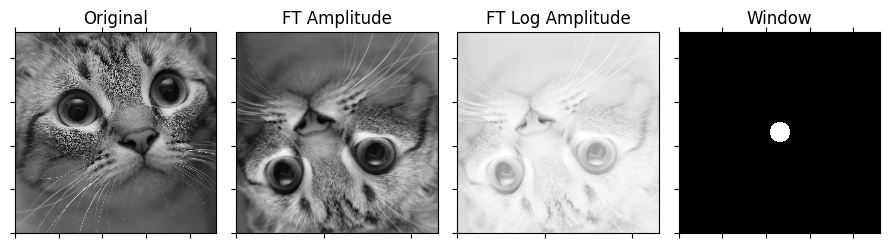

In [86]:
#Now we multiply the transformed image with the circular aperture
cat_trans = get2DFFT(the_cat)

#create space
N = the_cat.shape[0]  # make the 2 images the same size
space = np.linspace(-10, 10, N)
X, Y = np.meshgrid(space, space)

#Circular aperture
Z = 1.0 * ((X**2 + Y**2) <= 1**2)

Prod_circ_image = (cat_trans) * Z

plotimgfft(the_cat, Prod_circ_image, Z)
#the original image is the cat, while prod_circ_image is what I perform another FFT2 on, plus ploting the FT Amplitude and FT Log Amplitude

In [7]:
#Now let's try annular aperture
#Our space is already defined in the previous block
#create space
N = the_cat.shape[0]  # make the 2 images the same size
space = np.linspace(-10, 10, N)
X, Y = np.meshgrid(space, space)
#annular aperture
Z_ann = X**2 + Y**2
outer_circ = 1.0 * (10**2 >= Z_ann)
inner_circ = 1.0 * (Z_ann >= 8**2)

aperture = outer_circ + inner_circ

Text(0.5, 1.0, 'Annular')

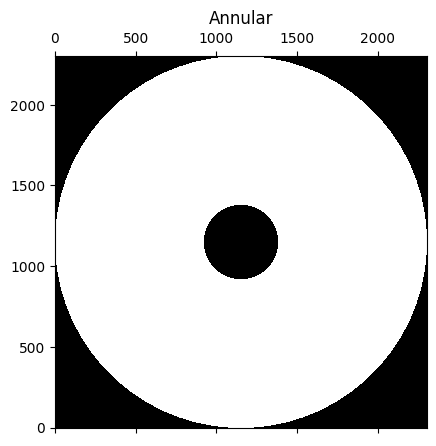

In [78]:
plt.matshow(aperture, cmap="gray", origin="lower")
plt.title("Annular")

(<Figure size 900x300 with 4 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'FT Amplitude'}>,
        <Axes: title={'center': 'FT Log Amplitude'}>,
        <Axes: title={'center': 'Window'}>], dtype=object))

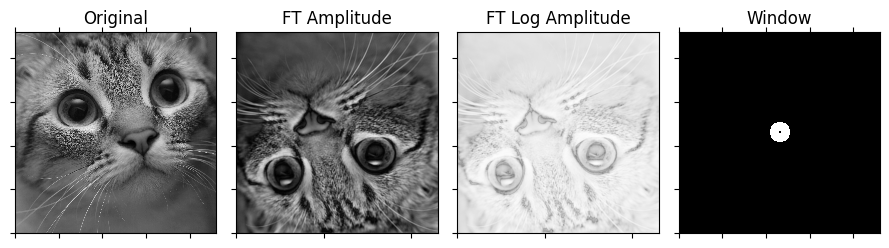

In [93]:
Prod_ann_image = cat_trans * aperture
plotimgfft(the_cat, Prod_ann_image, aperture)

(<Figure size 900x300 with 4 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'FT Amplitude'}>,
        <Axes: title={'center': 'FT Log Amplitude'}>,
        <Axes: title={'center': 'Window'}>], dtype=object))

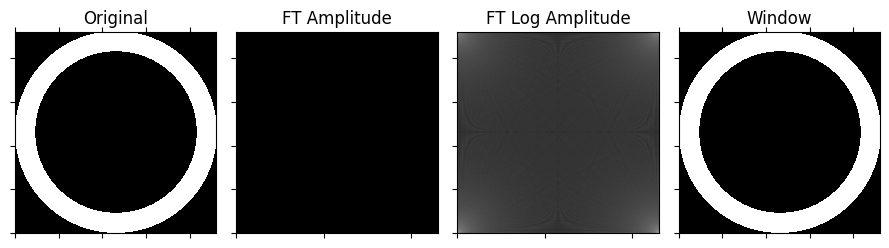

In [8]:
plotimgfft(aperture, aperture, aperture)